<a href="https://colab.research.google.com/github/Fidhasainabs/Fidha-sainab-s-task-1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')
print(df.head())
print("Shape:", df.shape)
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   surviv

In [ ]:
#encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.dtypes)


survived                     int64
pclass                       int64
age                        float64
sibsp                        int64
parch                        int64
fare                       float64
adult_male                    bool
alone                         bool
sex_male                      bool
embarked_Q                    bool
embarked_S                    bool
class_Second                  bool
class_Third                   bool
who_man                       bool
who_woman                     bool
deck_B                        bool
deck_C                        bool
deck_D                        bool
deck_E                        bool
deck_F                        bool
deck_G                        bool
embark_town_Queenstown        bool
embark_town_Southampton       bool
alive_yes                     bool
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
#standardization

numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


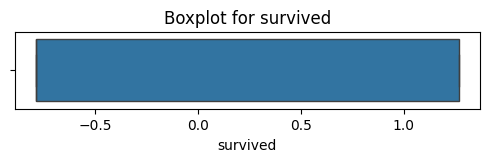

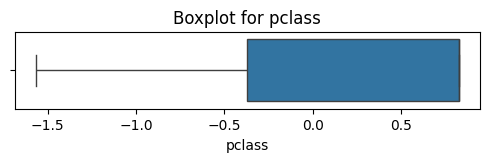

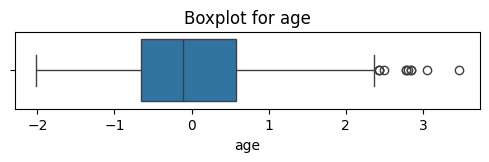

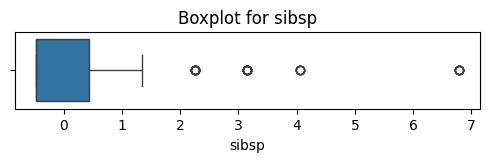

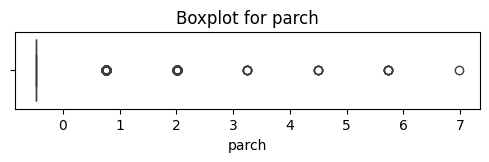

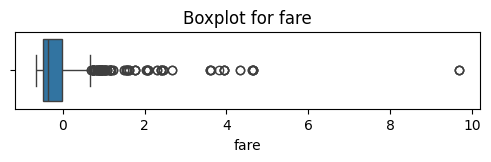

Original shape: (891, 24)
After removing outliers: (598, 24)


In [ ]:
# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Remove outliers
Q1 = df_encoded[numeric_cols].quantile(0.25)
Q3 = df_encoded[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_encoded[~((df_encoded[numeric_cols] < (Q1 - 1.5 * IQR)) |
                          (df_encoded[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df_encoded.shape)
print("After removing outliers:", df_cleaned.shape)
